# Spotify Song Data Analysis
## Introduction
This is my capstone 2, spotify song database

## Notebook Setup
### Importing Libraries

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
plt.style.use('seaborn-pastel');
import sklearn as sk;
import seaborn as sns;


### Reading the dataset

In [2]:
df = pd.read_csv('data\data.csv'); # Main dataset - Row is song
dfArtist = pd.read_csv('data\data_by_artist.csv'); # Row is artist
dfGenre = pd.read_csv('data\data_by_genres.csv'); # Row is genre
dfYear = pd.read_csv('data\data_by_year.csv'); # Row is year
dfWGenres = pd.read_csv('data\data_w_genres.csv'); # Row is artist

## Understanding the Categories
### Content
The "data.csv" file contains more than 170,000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the other datasets.

This dataset is uploaded by Kaggle user **Yamaç Eren Ay**, you can find the original dataset [here]("https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks).

### Primary:
- id (Id of track generated by Spotify)
### Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)
### Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
### Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

## First look at the dataset
### Main dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [16]:
df.describe().round(decimals=2)

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00
mean,0.53,1976.79,0.50,0.54,230948.31,0.48,0.08,0.17,5.20,0.21,-11.47,0.71,31.43,0.10,116.86
std,0.26,25.92,0.38,0.18,126118.41,0.27,0.28,0.31,3.52,0.17,5.70,0.46,21.83,0.16,30.71
min,0.00,1921.00,0.00,0.00,5108.00,0.00,0.00,0.00,0.00,0.00,-60.00,0.00,0.00,0.00,0.00
25%,0.32,1956.00,0.10,0.42,169827.00,0.26,0.00,0.00,2.00,0.10,-14.62,0.00,11.00,0.03,93.42
50%,0.54,1977.00,0.52,0.55,207467.00,0.47,0.00,0.00,5.00,0.14,-10.58,1.00,33.00,0.04,114.73
75%,0.75,1999.00,0.89,0.67,262400.00,0.70,0.00,0.10,8.00,0.26,-7.18,1.00,48.00,0.08,135.54
max,1.00,2020.00,1.00,0.99,5403500.00,1.00,1.00,1.00,11.00,1.00,3.86,1.00,100.00,0.97,243.51


There are a total of 170653 songs in the dataset; there are 15 numerical categories and 3 categorical categories (name, artist, release_date)

### Artist dataset
Below we have a dataset based on Artitsts:

In [17]:
dfArtist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [19]:
dfArtist.describe().round(decimals=2)

,mode,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00
mean,0.76,13.85,0.50,0.55,238878.00,0.50,0.17,0.20,-11.14,0.09,115.84,0.51,34.06,5.41
std,0.43,53.37,0.37,0.18,121131.84,0.25,0.30,0.14,5.77,0.11,25.00,0.24,22.38,3.48
min,0.00,1.00,0.00,0.00,18795.50,0.00,0.00,0.00,-60.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,0.12,0.43,182330.41,0.28,0.00,0.11,-13.97,0.04,99.37,0.33,12.00,2.00
50%,1.00,3.00,0.48,0.56,218640.00,0.50,0.00,0.16,-10.09,0.05,115.36,0.52,39.00,6.00
75%,1.00,8.00,0.90,0.68,268467.00,0.70,0.22,0.25,-6.89,0.10,129.85,0.70,51.00,8.00
max,1.00,3169.00,1.00,0.99,5403500.00,1.00,1.00,0.99,1.34,0.96,217.74,0.99,93.00,11.00


There are a total of 28680 artists in the dataset. Each artist have an average of 13.85 songs.

In [20]:
dfArtist[dfArtist['count'] == 3169]

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
8367,1,3169,0.984282,Francisco Canaro,0.659676,176986.34585,0.287555,0.537988,0.199492,-12.043738,0.110533,122.743169,0.745212,0.061849,2


Interestingly, the most proficient artist in Spotify is **Francisco Canaro**, a Uruguayan violinist and tango orchestra leader. His tracks are almost entirely acoustic. Unfortunately he is not very popular given a popularity score of 0.0618.

## Data Cleansing

In [6]:
dfClean = df
dfClean['artists'] = df['artists'].str.replace("'","");
dfClean['artists'] = df['artists'].str.replace("[","");
dfClean['artists'] = df['artists'].str.replace("]","");

In [7]:
dfClean.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


Reorder Columns

In [8]:
oldColumns = dfClean.columns.tolist()
oldColumns

['valence',
 'year',
 'acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'name',
 'popularity',
 'release_date',
 'speechiness',
 'tempo']

In [9]:
newCol = [
    'id', # Begin with categorical attributes of the song
    'name', 
    'artists',
    'release_date',
    'popularity', # Non accounstic attributes
    'year',
    'duration_ms',
    'valence', # Accoustic attributes
    'acousticness',
    'danceability',
    'energy',
    'explicit',
    'instrumentalness',
    'key',
    'liveness',
    'loudness',
    'mode',
    'speechiness',
    'tempo'
];

In [10]:
dfClean = dfClean[newCol]
dfClean.head()

,id,name,artists,release_date,popularity,year,duration_ms,valence,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","Sergei Rachmaninoff, James Levine, Berliner Ph...",1921,4,1921,831667,0.0594,0.982,0.279,0.211,0,0.878000,10,0.665,-20.096,1,0.0366,80.954
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,Dennis Day,1921,5,1921,180533,0.9630,0.732,0.819,0.341,0,0.000000,7,0.160,-12.441,1,0.4150,60.936
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,1921,5,1921,500062,0.0394,0.961,0.328,0.166,0,0.913000,3,0.101,-14.850,1,0.0339,110.339
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,Frank Parker,1921,3,1921,210000,0.1650,0.967,0.275,0.309,0,0.000028,5,0.381,-9.316,1,0.0354,100.109
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,Phil Regan,1921,2,1921,166693,0.2530,0.957,0.418,0.193,0,0.000002,3,0.229,-10.096,1,0.0380,101.665


## Dat Visualizations
In the next section I visualize the data through various types of methods

### Distribution Visualization
I begin with a simple histogram of each numerical category in the dataset. 


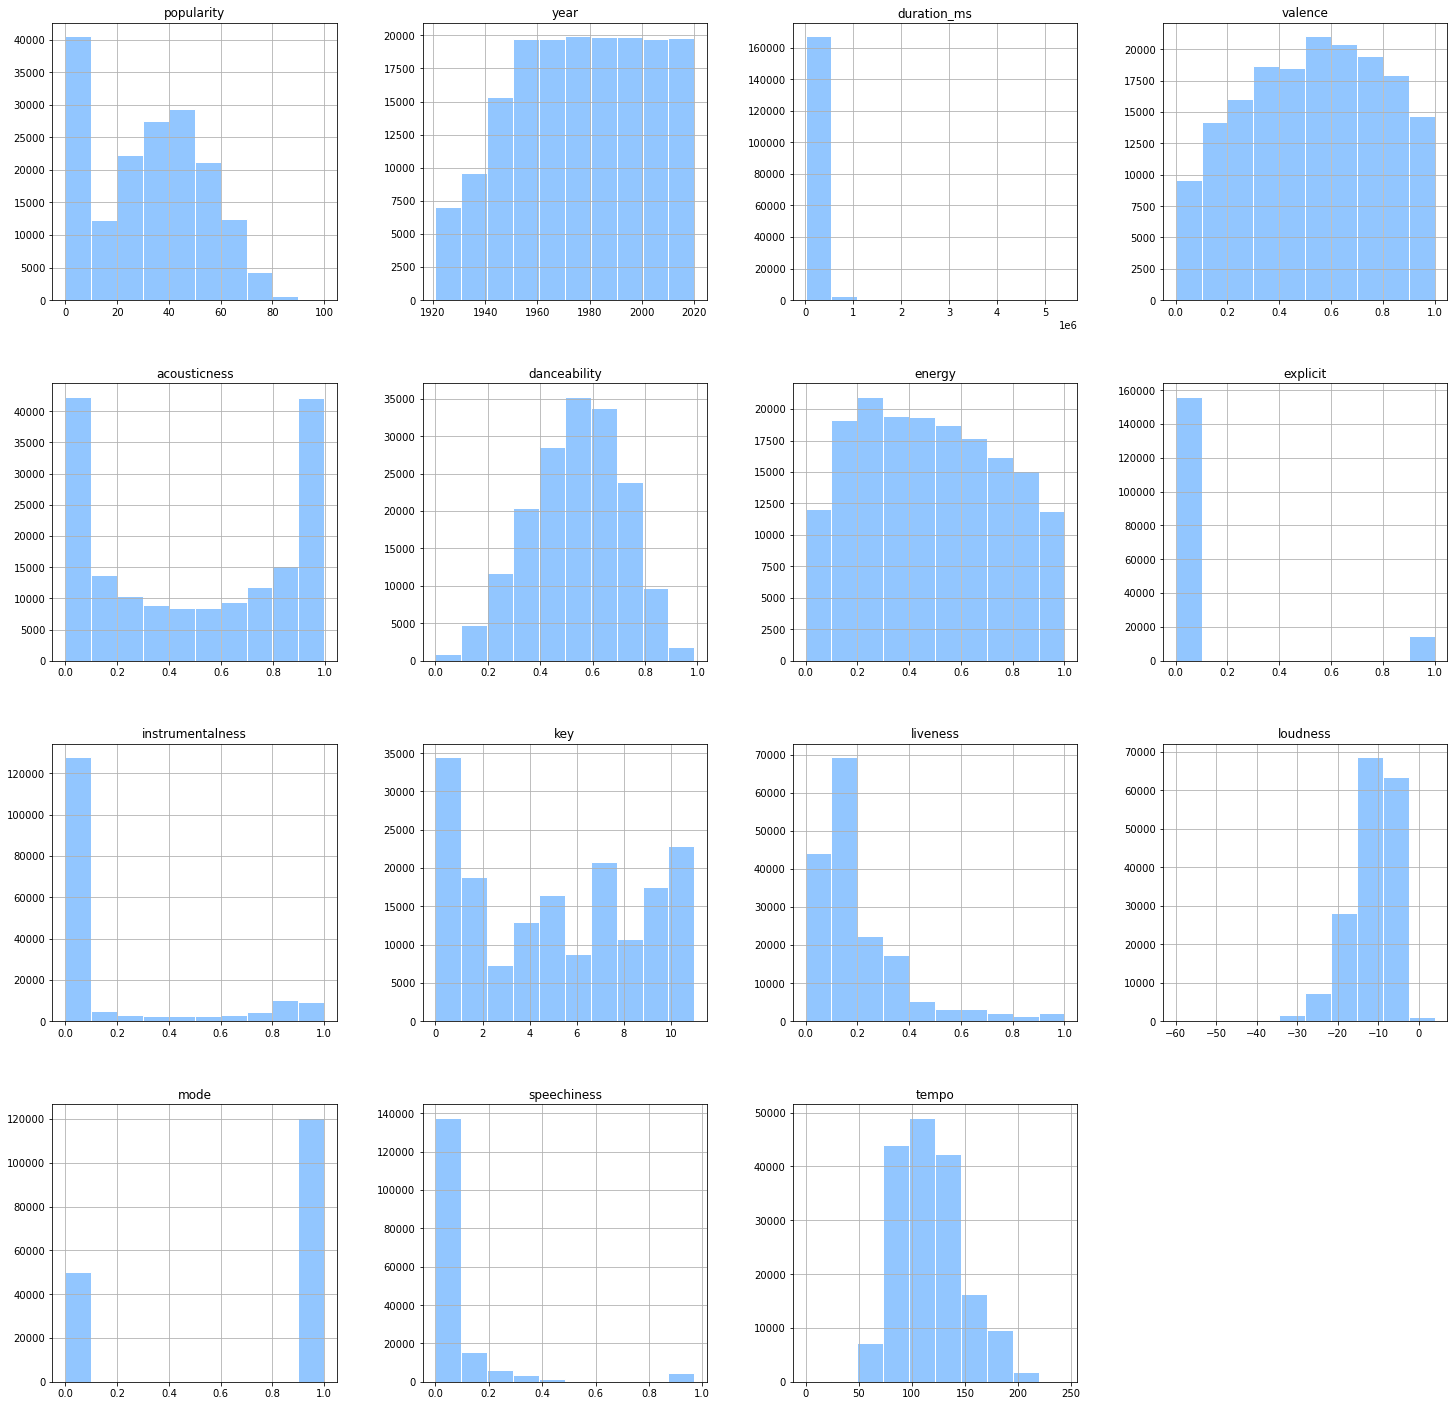

In [11]:
dfClean.hist(figsize=(25,25), edgecolor='#FFFFFF')
plt.show()

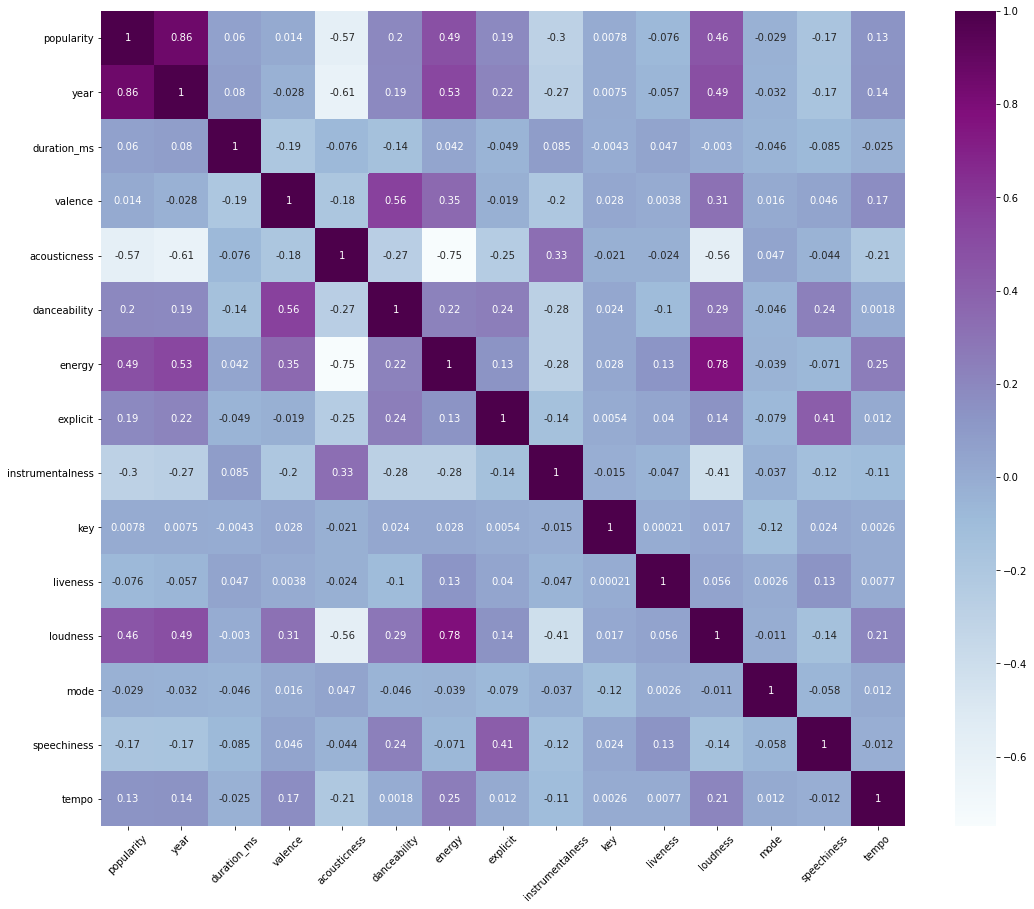

In [12]:
fig, ax = plt.subplots(figsize=(18,15))
ax = sns.heatmap(
    dfClean.corr(),
    cmap='BuPu',
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45
)
plt.show()